In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [22]:
train_data = datasets.FashionMNIST(root='./data', download=True, train=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='/data', download=True, train=False, transform=transforms.ToTensor())

In [23]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
len(train_data.classes)

10

In [25]:
train = DataLoader(train_data, batch_size=32, shuffle=True)
test = DataLoader(test_data, batch_size=32)

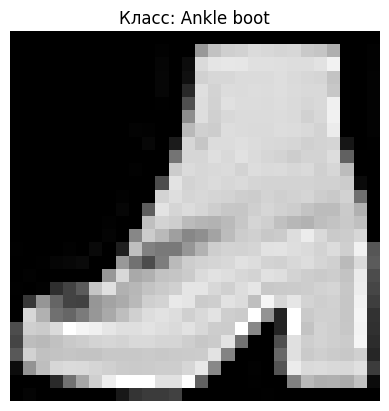

In [26]:
image, label = next(iter(train))
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f'Класс: {train_data.classes[label[0]]}')
plt.axis('off')
plt.savefig('image')
plt.show()

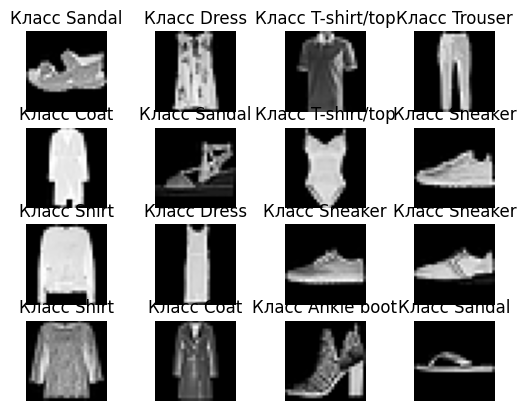

In [27]:
image, label = next(iter(train))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image[i].squeeze(), cmap='gray')
    plt.title(f'Класс {train_data.classes[label[i]]}')
    plt.axis('off')
plt.savefig('image_set')
plt.show()

In [28]:
class CheckImage(nn.Module):
    def __init__(self):
        super().__init__()
        self.first = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.second = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 14 * 14, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, image):
        image = self.first(image)
        image = self.second(image)
        return image

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [30]:
device

device(type='cuda')

In [31]:
model = CheckImage().to(device)

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [33]:
for epoch in range(100):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f'Эпоха {epoch +1} -- Потери: {round(total_loss, 2)}')

Эпоха 1 -- Потери: 773.47
Эпоха 2 -- Потери: 565.53
Эпоха 3 -- Потери: 502.55
Эпоха 4 -- Потери: 462.97
Эпоха 5 -- Потери: 428.48
Эпоха 6 -- Потери: 410.95
Эпоха 7 -- Потери: 384.17
Эпоха 8 -- Потери: 364.4
Эпоха 9 -- Потери: 352.76
Эпоха 10 -- Потери: 340.16
Эпоха 11 -- Потери: 324.47
Эпоха 12 -- Потери: 309.54
Эпоха 13 -- Потери: 307.73
Эпоха 14 -- Потери: 306.58
Эпоха 15 -- Потери: 302.91
Эпоха 16 -- Потери: 284.62
Эпоха 17 -- Потери: 277.83
Эпоха 18 -- Потери: 257.74
Эпоха 19 -- Потери: 269.48
Эпоха 20 -- Потери: 257.28
Эпоха 21 -- Потери: 263.94
Эпоха 22 -- Потери: 260.28
Эпоха 23 -- Потери: 237.31
Эпоха 24 -- Потери: 257.35
Эпоха 25 -- Потери: 242.16
Эпоха 26 -- Потери: 259.38
Эпоха 27 -- Потери: 235.99
Эпоха 28 -- Потери: 227.67
Эпоха 29 -- Потери: 247.9
Эпоха 30 -- Потери: 232.99
Эпоха 31 -- Потери: 223.43
Эпоха 32 -- Потери: 239.8
Эпоха 33 -- Потери: 236.06
Эпоха 34 -- Потери: 218.18
Эпоха 35 -- Потери: 224.6
Эпоха 36 -- Потери: 227.66
Эпоха 37 -- Потери: 197.59
Эпоха 38 -- По

In [34]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for x_batch, y_batch in test:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        prediction = torch.argmax(y_pred, dim=1)
        total += y_batch.size(0)
        correct += (prediction == y_batch).sum().item()

accuracy = correct * 100 / total
print(f'Точеность модели на тестовых данных: {round(accuracy, 2)}%')

Точеность модели на тестовых данных: 88.36%


In [35]:
torch.save(model.state_dict(), 'model.pth')